In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential, models

# **Initial Variables for CNN**

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS = 10

# **Train Dataset Preprocessing**

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/gdrive/MyDrive/CNN/yeni_train_potato",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size= BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=12,
    validation_split= None,
)

Found 5702 files belonging to 3 classes.


### **Train Dataset Classes**

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


# **Validation Dataset**

In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/CNN/yeni_validation_potato",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size= BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=12,
    validation_split= None,
)

Found 1426 files belonging to 3 classes.


### **Validation Dataset Classes**

In [ ]:
class_names = validation_dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


# **Features of Datasets**

In [ ]:
print(train_dataset)
print(validation_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


# **Class Distributions**

> ## **Train and Validation Dataset Class Distribution**





In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

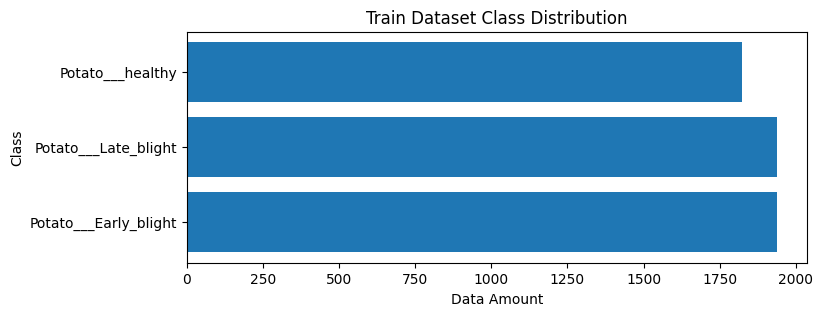

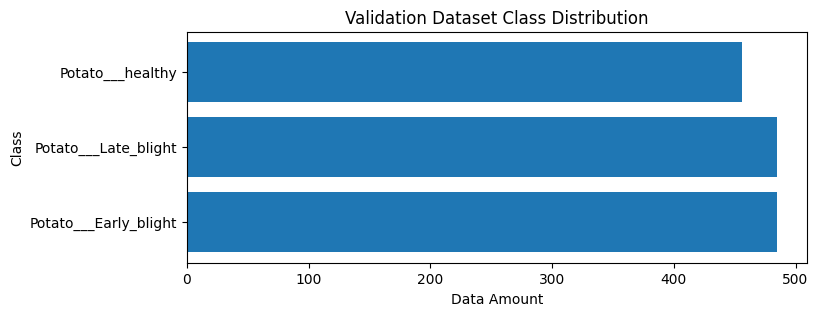

In [ ]:
def plot_class_distribution(dataset, class_names, dataset_name):
    # Tüm etiketleri al ve sınıf sayılarını hesapla
    all_labels = np.concatenate([labels.numpy() for _, labels in dataset], axis=0)
    class_counts = np.sum(all_labels, axis=0)

    # Sınıf dağılımını görselleştir
    plt.figure(figsize=(8, 3))
    plt.barh(class_names, class_counts)
    plt.title(dataset_name + ' Class Distribution')
    plt.xlabel('Data Amount')
    plt.ylabel('Class')
    plt.show()

# Eğitim kümesi için sınıf dağılımını görselleştirme
plot_class_distribution(train_dataset, train_dataset.class_names, "Train Dataset")

# Doğrulama kümesi için sınıf dağılımını görselleştirme
plot_class_distribution(validation_dataset, validation_dataset.class_names, "Validation Dataset")

# **Data Visualization**

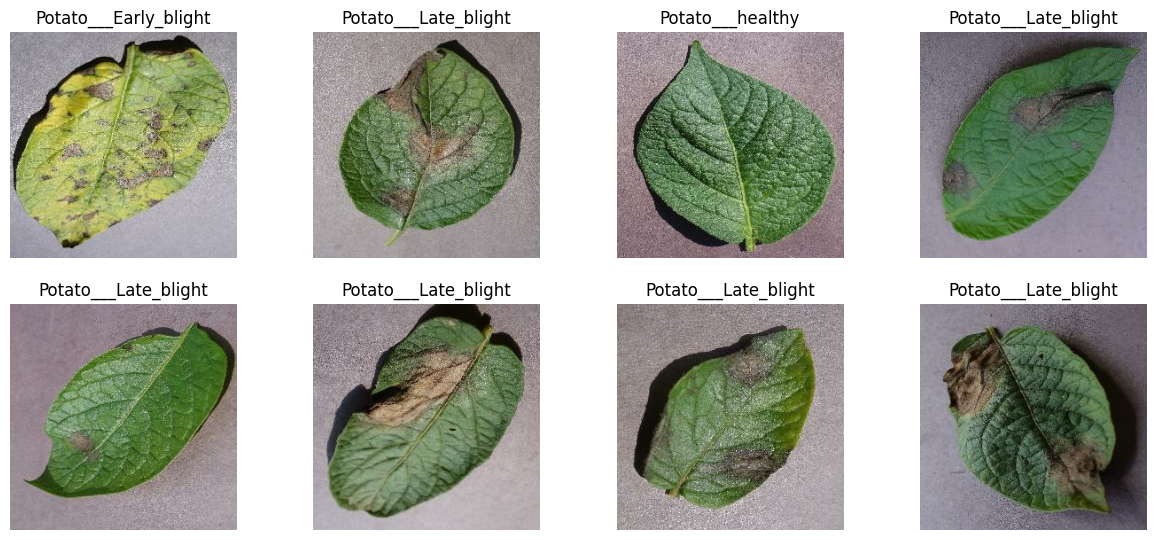

In [ ]:
images = []
labels = []
for image_batch, label_batch in train_dataset.take(1):
    for i in range(8):
        images.append(image_batch[i].numpy().astype('int'))
        labels.append(train_dataset.class_names[label_batch[i].numpy().argmax()])

plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# **Understanding the Matrix of a data from a batch**

>This process illustrates the vectorized matrix of data from a batch. For this project, the batch size is 32, and I'm going to utilize the first image data from the randomly selected batch.

The outermost [ ]: This represents a Python list. This list contains all the pixel values of an image. Each item contains a 2-dimensional array representing a row.

The second [ ]: This represents a Python list representing a row. Each item contains a 1-dimensional array representing a column.

The third [ ]: This represents a Python list representing a pixel. Each item is a number representing an RGB component

(256, 256, 3)
[[[156. 163. 189.]
  [157. 164. 190.]
  [157. 164. 190.]
  ...
  [101. 107. 131.]
  [102. 108. 132.]
  [103. 109. 133.]]

 [[153. 160. 186.]
  [155. 162. 188.]
  [157. 164. 190.]
  ...
  [107. 113. 137.]
  [110. 116. 140.]
  [111. 117. 141.]]

 [[155. 162. 188.]
  [158. 165. 191.]
  [161. 168. 194.]
  ...
  [108. 114. 138.]
  [111. 117. 141.]
  [114. 120. 144.]]

 ...

 [[155. 158. 177.]
  [153. 156. 175.]
  [150. 153. 172.]
  ...
  [ 99. 100. 120.]
  [107. 108. 128.]
  [104. 105. 125.]]

 [[158. 161. 180.]
  [156. 159. 178.]
  [152. 155. 174.]
  ...
  [ 98.  99. 119.]
  [ 83.  84. 104.]
  [ 84.  85. 105.]]

 [[155. 158. 177.]
  [155. 158. 177.]
  [155. 158. 177.]
  ...
  [117. 118. 138.]
  [104. 105. 125.]
  [ 94.  95. 115.]]]

(32, 3)
[1. 0. 0.]



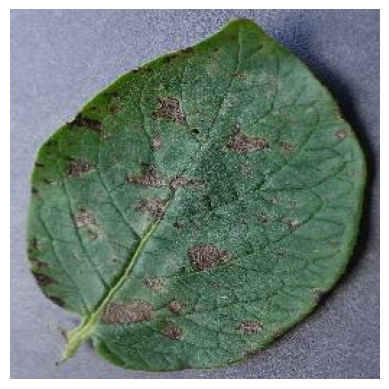

In [ ]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.numpy()[0].shape)
    print(image_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    plt.imshow(image_batch.numpy()[0].astype('uint8'))
    plt.axis('off')

# **Splittin Validation Dataset into Validation and Test Datasets**

In [ ]:
def partition_of_validation_set(dataset, val_split = 0.8, test_split=0.2, shuffle= True, shuffle_size= 10000):

    if shuffle:
      dataset = dataset.shuffle(shuffle_size, seed=12)

    dataset_size = len(dataset)

    val_size = int(val_split * dataset_size)
    test_size = int(test_split * dataset_size)

    val_data =dataset.take(val_size)
    test_data= dataset.skip(val_size).take(test_size)


    return val_data, test_data

# **Batch Sizes of each Dataset**

In [ ]:
val_data, test_data = partition_of_validation_set(validation_dataset)
print(val_data,"\n",test_data,"\n")
print("Batch Size of Training Data", len(train_dataset))
print("Batch Size of Validation Data",len(val_data))
print("Batch Size of Test Data",len(test_data))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))> 
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))> 

Batch Size of Training Data 179
Batch Size of Validation Data 36
Batch Size of Test Data 9


# **Building the Model**


> **For this dataset, I'm going to use a CNN Model defined by me**



## **Building a pipeline**
> This process is typically part of a data processing pipeline used to optimize data input. A data processing pipeline consists of a series of steps such as data loading, preprocessing, caching, splitting into training and validation data, among others. This pipeline manages the flow of data during model training and includes various techniques to optimize data processing.

* cache(): This method caches the dataset in memory. It can improve access speed to the data, especially if a small dataset is used or if the same dataset is needed multiple times.

* prefetch(buffer_size=AUTOTUNE):  This method speeds up data loading from the dataset. The buffer_size parameter determines how much data to prefetch. Setting buffer_size to AUTOTUNE allows TensorFlow to automatically determine an optimized value, making data loading operations more efficient. This can reduce training time by parallelizing data loading and processing during model training and validation.


In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### **Rescaling the train data and building a model**


In [ ]:
n_classes = 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
model = tf.keras.Sequential([
    # Rescaling: Normalize pixel values to [0,1] range
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),

    # CNN
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Dropout Layer
    layers.Flatten(),
    layers.Dropout(0.2),

    # ANN (Fully Connected Part)
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)       

In [ ]:
model.compile(
    optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

### **Training the model**

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs= EPOCHS,
)

Epoch 1/10
179/179 [==============================] - 15s 72ms/step - loss: 0.5818 - accuracy: 0.7338 - val_loss: 0.2696 - val_accuracy: 0.8998
Epoch 2/10
179/179 [==============================] - 13s 71ms/step - loss: 0.2382 - accuracy: 0.9127 - val_loss: 0.2269 - val_accuracy: 0.9112
Epoch 3/10
179/179 [==============================] - 13s 71ms/step - loss: 0.1382 - accuracy: 0.9488 - val_loss: 0.1105 - val_accuracy: 0.9587
Epoch 4/10
179/179 [==============================] - 13s 71ms/step - loss: 0.0754 - accuracy: 0.9718 - val_loss: 0.0888 - val_accuracy: 0.9710
Epoch 5/10
179/179 [==============================] - 13s 71ms/step - loss: 0.0414 - accuracy: 0.9847 - val_loss: 0.0962 - val_accuracy: 0.9684
Epoch 6/10
179/179 [==============================] - 13s 70ms/step - loss: 0.1007 - accuracy: 0.9639 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 7/10
179/179 [==============================] - 13s 73ms/step - loss: 0.0566 - accuracy: 0.9793 - val_loss: 0.1022 - val_accuracy:

### **Evaluate the Model**

Text(0.5, 1.0, 'Training and Validation Loss')

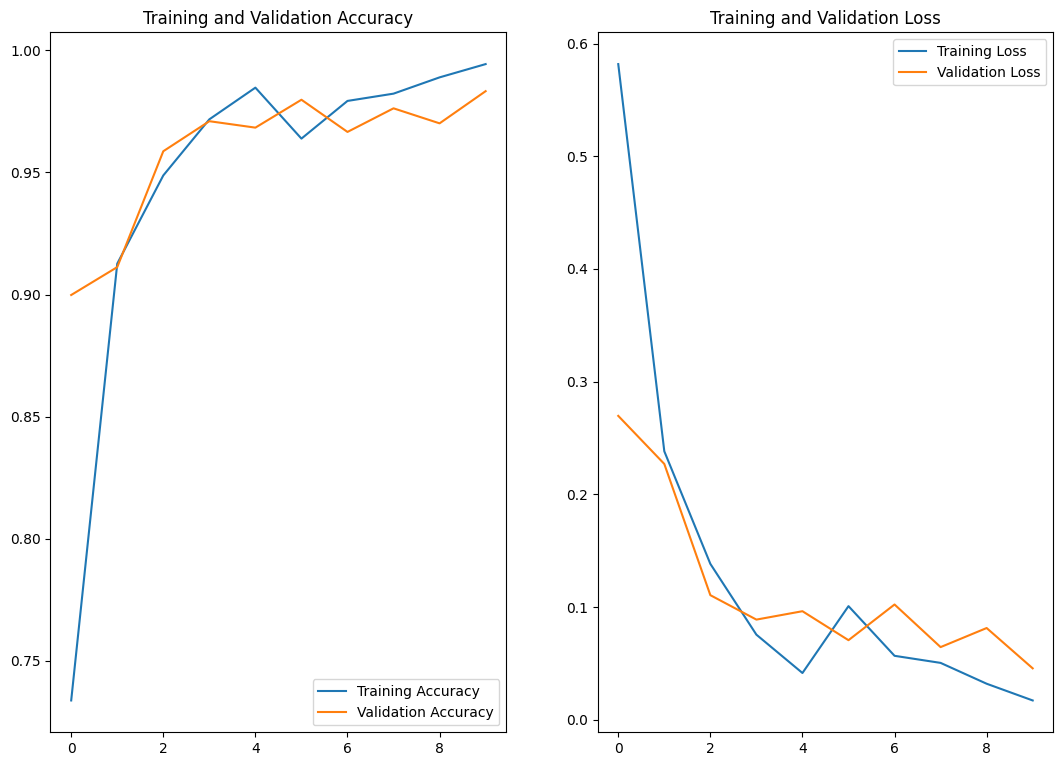

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

### **Save the trained model**

In [ ]:
# Save the trained model
model.save("/content/gdrive/MyDrive/CNN/en_son.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Test the Trained Model by using Test Dataset**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

9/9 [==============================] - 0s 24ms/step
Accuracy: 0.9895833333333334
Confusion Matrix:
[[ 83   2   1]
 [  0 103   0]
 [  0   0  99]]
Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.97      0.98        86
 Potato___Late_blight       0.98      1.00      0.99       103
     Potato___healthy       0.99      1.00      0.99        99

             accuracy                           0.99       288
            macro avg       0.99      0.99      0.99       288
         weighted avg       0.99      0.99      0.99       288

Accuracy: 0.9895833333333334


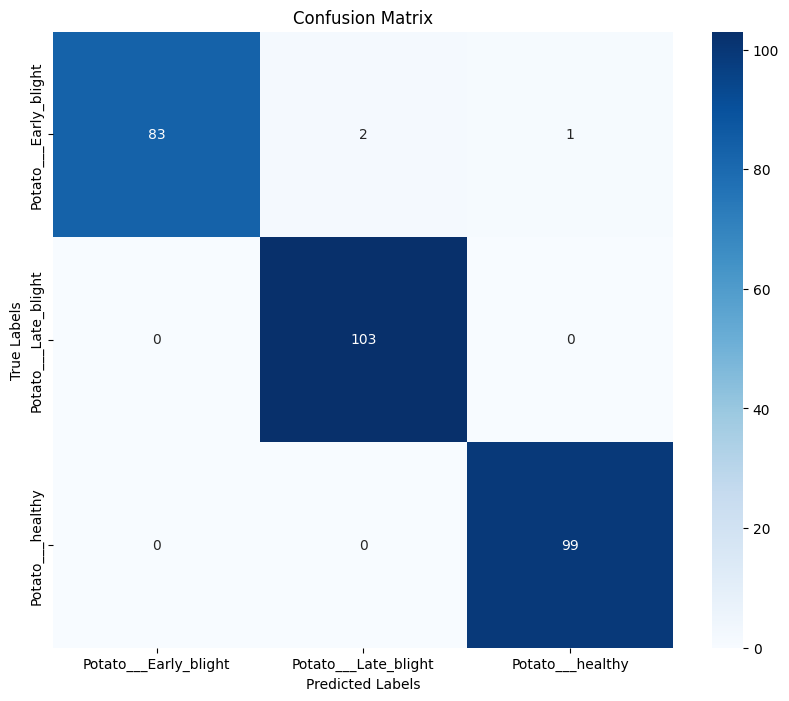

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/CNN/en_son.h5')

# Prepare the test data for prediction
AUTOTUNE = tf.data.experimental.AUTOTUNE
test_data_prefetched = test_data.cache().prefetch(buffer_size=AUTOTUNE)

# Make predictions
predictions = loaded_model.predict(test_data_prefetched)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from test dataset
true_labels = []
for images, labels in test_data_prefetched.unbatch():
    true_labels.append(np.argmax(labels.numpy()))

true_labels = np.array(true_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score and other metrics
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()